In [ ]:
# 题目：波士顿房价预测
# 背景
# 波士顿房价数据集是一个经典的回归问题数据集，包含波士顿郊区的房屋数据。每个样本包含多个特征，如犯罪率、平均房间数等，目标是预测房屋的中位价。

# 数据集
# 训练数据集：train.csv，包含已标记的房屋数据。
# 测试数据集：test.csv，包含未标记的房屋数据。
# 数据字段：
    # CRIM：城镇人均犯罪率。
    # ZN：25000平方英尺以上的住宅用地比例。
    # INDUS：城镇非零售商业用地比例。
    # CHAS：查尔斯河虚拟变量（如果靠近河流则为1，否则为0）。
    # NOX：一氧化氮浓度。
    # RM：住宅平均房间数。
    # AGE：1940年以前建造的自住单位比例。
    # DIS：到五个波士顿就业中心的加权距离。
    # RAD：径向公路可达性指数。
    # TAX：每10000美元的全值财产税率。
    # PTRATIO：城镇师生比例。
    # B：1000(Bk - 0.63)^2，其中Bk是城镇黑人的比例。
    # LSTAT：人口中地位较低者的比例。
    # MEDV：目标变量，房屋中位价（仅在训练集中有此字段）。
# 任务
# 数据预处理：
# 加载数据集。
# 处理缺失值（如果有）。
# 标准化或归一化数值特征。
# 特征工程：
# 选择合适的特征。
# 创建新的特征（可选）。
# 模型训练：
# 选择合适的机器学习算法（如线性回归、决策树、随机森林、支持向量机等）。
# 划分训练集和验证集。
# 训练模型。
# 调整超参数以优化模型性能。
# 模型评估：
# 使用均方误差（MSE）、均方根误差（RMSE）、R²分数等指标评估模型性能。
# 绘制残差图。
# 测试数据预测：
# 对测试数据集进行预测。
# 将预测结果保存到CSV文件中，格式为：test_predictions.csv，包含两列：ID 和 PredictedPrice。
# 提交要求
# 提交的文件包括：
# test_predictions.csv：包含测试数据集的预测结果。
# code.ipynb：包含完整代码和注释的Jupyter Notebook文件。
# 评分标准
# 准确性：预测结果的准确性（占40%）。
# 代码质量：代码的可读性和结构（占30%）。
# 模型性能：模型的性能指标（占30%）。


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [4]:
# 1. 数据预处理
train_data = pd.read_csv('./boston_train.csv')
test_data = pd.read_csv('./boston_test.csv')

In [5]:
# 分离特征和目标变量
X_train = train_data.drop(['MEDV'], axis=1)
y_train = train_data['MEDV']
X_test = test_data.drop(['ID'], axis=1)


In [6]:
# 标准化特征
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:

# 2. 特征工程（可选）
# 例如，可以创建新的特征或选择特定的特征

# 3. 模型训练
model = LinearRegression()
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)
model.fit(X_train_split, y_train_split)


LinearRegression()

In [8]:
# 4. 模型评估
y_val_pred = model.predict(X_val_split)

In [9]:
# 计算评估指标
mse = mean_squared_error(y_val_split, y_val_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val_split, y_val_pred)
mae = mean_absolute_error(y_val_split, y_val_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 153.75146008836214
Root Mean Squared Error (RMSE): 12.399655643942785
R² Score: -0.0022178658591371914
Mean Absolute Error (MAE): 10.577064181635409


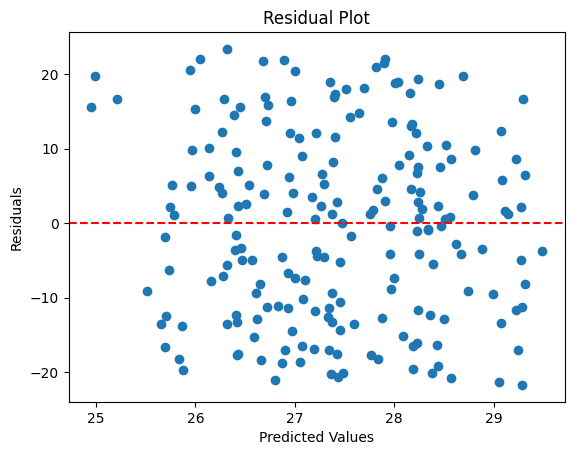

In [10]:

# 绘制残差图
residuals = y_val_split - y_val_pred
plt.scatter(y_val_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [11]:
# 5. 测试数据预测
test_predictions = model.predict(X_test_scaled)
test_data['PredictedPrice'] = test_predictions
test_data[['ID', 'PredictedPrice']].to_csv('test_bostan_predictions.csv', index=False)